# fig 5c: bump score of 1000 place cells

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load('/home/yulingwu/CCS_place_grid_0710/Storing_multiple_maps/test/result_20250709/grid_module/place_1000/bump_scores_place_only.npz')
bump_score_orginal = data['bump_score_orginal_only']
bump_score_others = data['bump_score_others_only']
bump_score_orginal_std = data['bump_score_orginal_std_only']
bump_score_others_std = data['bump_score_others_std_only']

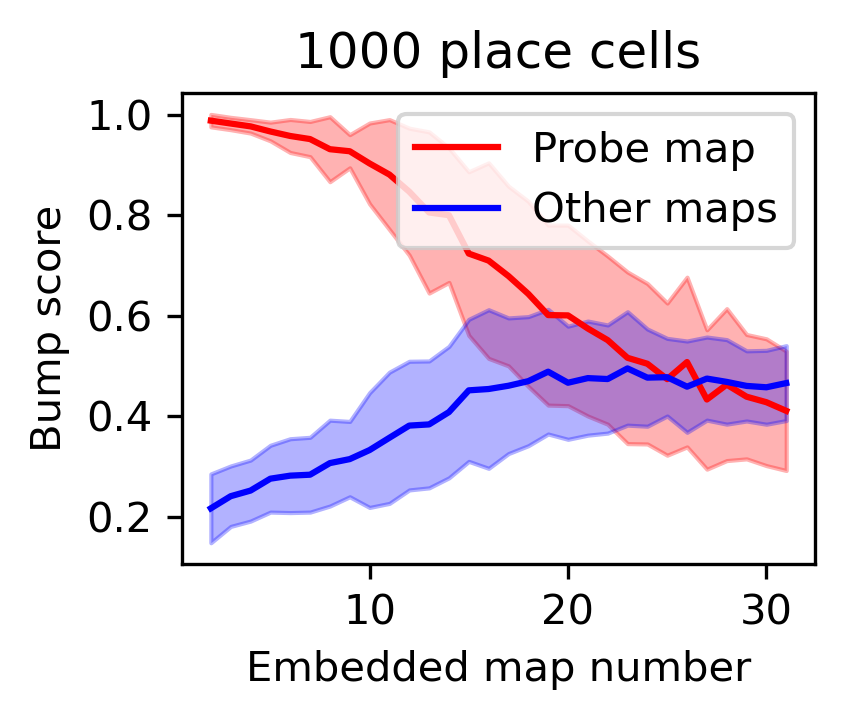

In [2]:
map_num_all = np.arange(30) + 2
trial = 1

# Create a single plot
plt.figure(figsize=(3.5/1.2,3/1.2),dpi=300)

# Plot bump_score_orginal and bump_score_others with error bars
plt.plot(map_num_all, bump_score_orginal, color='red', label='Probe map')
plt.fill_between(map_num_all, bump_score_orginal - bump_score_orginal_std/np.sqrt(trial), bump_score_orginal + bump_score_orginal_std/np.sqrt(trial), color='red', alpha=0.3)

plt.plot(map_num_all, bump_score_others, color='blue', label='Other maps')
plt.fill_between(map_num_all, bump_score_others - bump_score_others_std/np.sqrt(trial), bump_score_others + bump_score_others_std/np.sqrt(trial), color='blue', alpha=0.3)

plt.title('1000 place cells')
plt.xlabel('Embedded map number')
plt.ylabel('Bump score')
plt.legend()
plt.grid(False)

# Save the plot
plt.tight_layout()
# plt.savefig('figure/c.pdf', format='pdf')
plt.show()

# fig 5c: bump score of 800 place cells + 200 grid cells

In [3]:
data = np.load('/home/yulingwu/CCS_place_grid_0710/Storing_multiple_maps/test/result_20250709/grid_module/place_800_grid_20_module_10/bump_scores_coupled_net_shufflephase.npz')
bump_score_orginal=data['bump_score_orginal']
bump_score_others=data['bump_score_others']
bump_score_orginal_std=data['bump_score_orginal_std']
bump_score_others_std=data['bump_score_others_std']

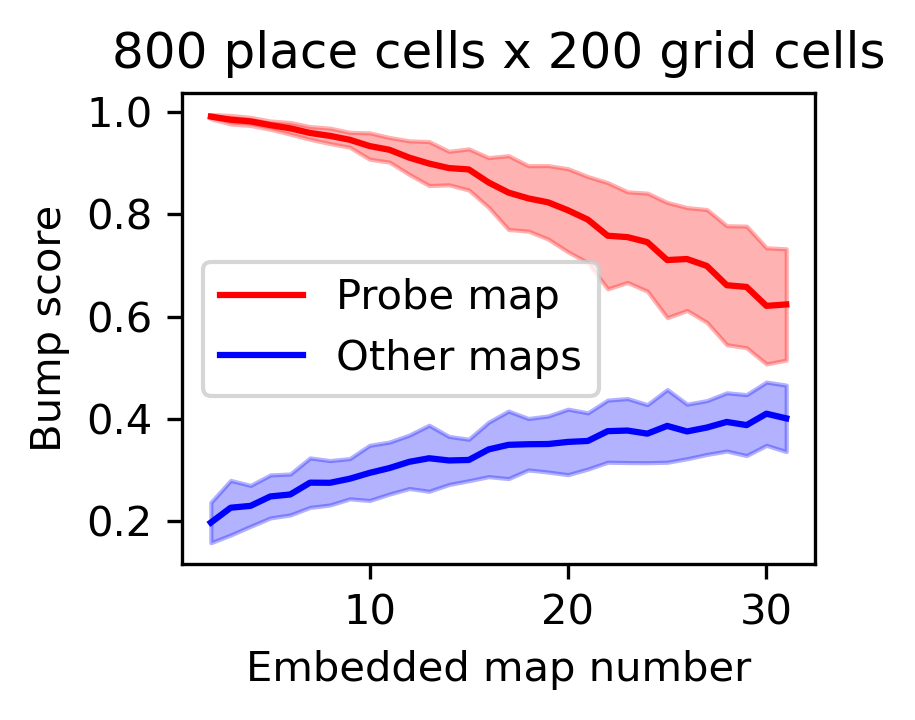

In [4]:
map_num_all = np.arange(30) + 2

# Create a single plot
plt.figure(figsize=(3.5/1.2,3/1.2),dpi=300)

# Plot bump_score_orginal and bump_score_others with error bars
plt.plot(map_num_all, bump_score_orginal, color='red', label='Probe map')
plt.fill_between(map_num_all, bump_score_orginal - bump_score_orginal_std, bump_score_orginal + bump_score_orginal_std, color='red', alpha=0.3)

plt.plot(map_num_all, bump_score_others, color='blue', label='Other maps')
plt.fill_between(map_num_all, bump_score_others - bump_score_others_std, bump_score_others + bump_score_others_std, color='blue', alpha=0.3)

plt.title('800 place cells x 200 grid cells')
plt.xlabel('Embedded map number')
plt.ylabel('Bump score')
plt.legend()
plt.grid(False)

# Save the plot
plt.tight_layout()
# plt.savefig('figure_v3/d.pdf', format='pdf')
plt.show()

# fig 6a: Jg_p/Jp

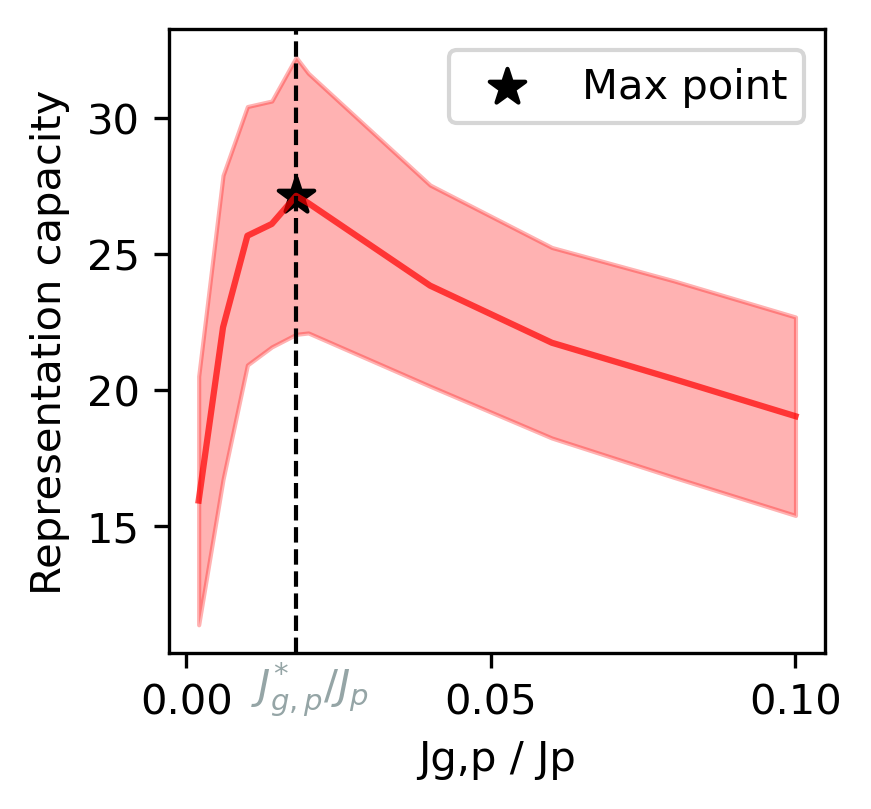

In [39]:
import os
import numpy as np

Ws = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5] 
work_dir = '/home/yulingwu/CCS_place_grid_0710/Storing_multiple_maps/test/result_20250709/W0'
data = np.zeros((len(Ws), 30))

for emer, W in enumerate(Ws):
  # 设置次级目录
  sub_dir = os.path.join(work_dir, f'{W}')
  os.makedirs(sub_dir, exist_ok=True)
  os.chdir(sub_dir)
  capacity = np.load(os.path.join(sub_dir, 'capacity.npz'))
  data[emer] = capacity['capacity'][:30]

only_data = np.load(work_dir + '/1000_place/capacity.npz')['capacity'][:30]

import matplotlib.pyplot as plt
# 计算均值和标准差
mean_capacity = data.mean(axis=1)
std_capacity = data.std(axis=1) # 标准误差
only_mean_capacity = np.full(len(Ws), only_data.mean())
only_std_capacity = np.full(len(Ws), only_data.std())  # 标准误差

Ws = np.array(Ws) / 5  # 将Ws转换为numpy数组并除以5

plt.figure(figsize=(3,2.8), dpi=300)
plt.plot(Ws, mean_capacity, color='red', alpha=0.7)
plt.fill_between(Ws, mean_capacity - std_capacity, mean_capacity + std_capacity, color='red', alpha=0.3)

# 用蓝色竖线标记最大值
max_idx = mean_capacity.argmax()
plt.axvline(Ws[max_idx], color='black', linestyle='--', linewidth=1)
plt.scatter(Ws[max_idx], mean_capacity[max_idx], color='black', marker='*', s=80, label='Max point')
plt.text(Ws[max_idx]+0.012, 9, '${J}^{*}_{g,p} / J_{p}$', va='center', ha='right', color="#95a5a6", fontsize=10)


plt.xticks([0, 0.05, 0.1])
plt.xlabel('Jg,p / Jp')
plt.ylabel('Representation capacity')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig(work_dir + '/capacity_vs_JgJp.pdf', format='pdf')
plt.show()


# fig S9a: neural number

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

num = [400,500,600,700,800,900,1000]
work_dir = '/home/yulingwu/CCS_place_grid_0710/Storing_multiple_maps/test/result_20250709/neuron_num'
couple_map_num = np.zeros((len(num), 30))
only_map_num = np.zeros((len(num), 30))

place_nums = [400, 500, 600, 700, 800, 900, 1000]
for emer, place_num in enumerate(place_nums):
  sub_dir = os.path.join(work_dir, f'place_{place_num}')
  capacity = np.load(os.path.join(sub_dir, 'capacity.npz'))
  only_map_num[emer] = capacity['capacity'][:30]


module_num = 10
place_nums = [320, 400, 480, 560, 640, 720, 800] #
grid_nums = [8, 10, 12, 14, 16, 18, 20] # 
for emer, (place_num, grid_num) in enumerate(zip(place_nums, grid_nums)):
  sub_dir = os.path.join(work_dir, f'place_{place_num}_grid_{grid_num}_module_{module_num}')
  capacity = np.load(os.path.join(sub_dir, 'capacity.npz'))
  couple_map_num[emer] = capacity['capacity'][:30]

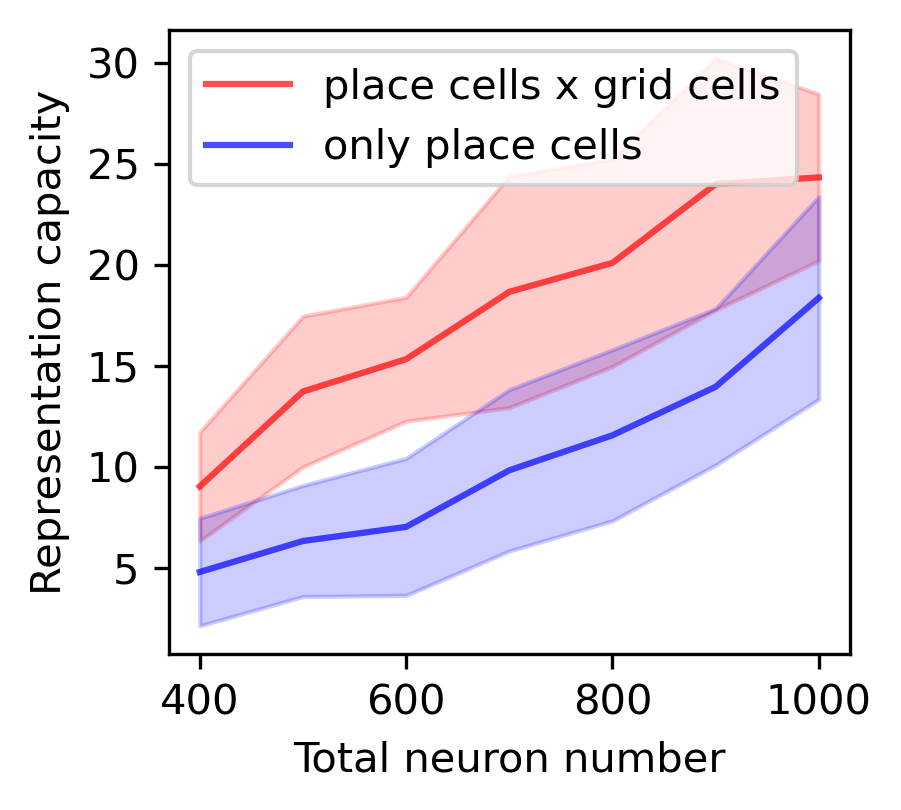

In [6]:
# 计算每组的平均值和标准差
only_map_num_mean = only_map_num.mean(axis=1)
only_map_num_std = only_map_num.std(axis=1)
couple_map_num_mean = couple_map_num.mean(axis=1)
couple_map_num_std = couple_map_num.std(axis=1)

plt.figure(figsize=(3.1, 2.8), dpi=300)
plt.plot(num, couple_map_num_mean, color='red', alpha=0.7, label='place cells x grid cells')
plt.fill_between(num, couple_map_num_mean - couple_map_num_std, couple_map_num_mean + couple_map_num_std, color='red', alpha=0.2)
plt.plot(num, only_map_num_mean, color='blue', alpha=0.7, label='only place cells')
plt.fill_between(num, only_map_num_mean - only_map_num_std, only_map_num_mean + only_map_num_std, color='blue', alpha=0.2)
plt.legend()
plt.xlabel('Total neuron number')
plt.ylabel('Representation capacity')
# plt.grid(True)
plt.tight_layout()
# plt.savefig('figure_v3/e.pdf', format='pdf')
plt.show()


# fig S9b: grid_module

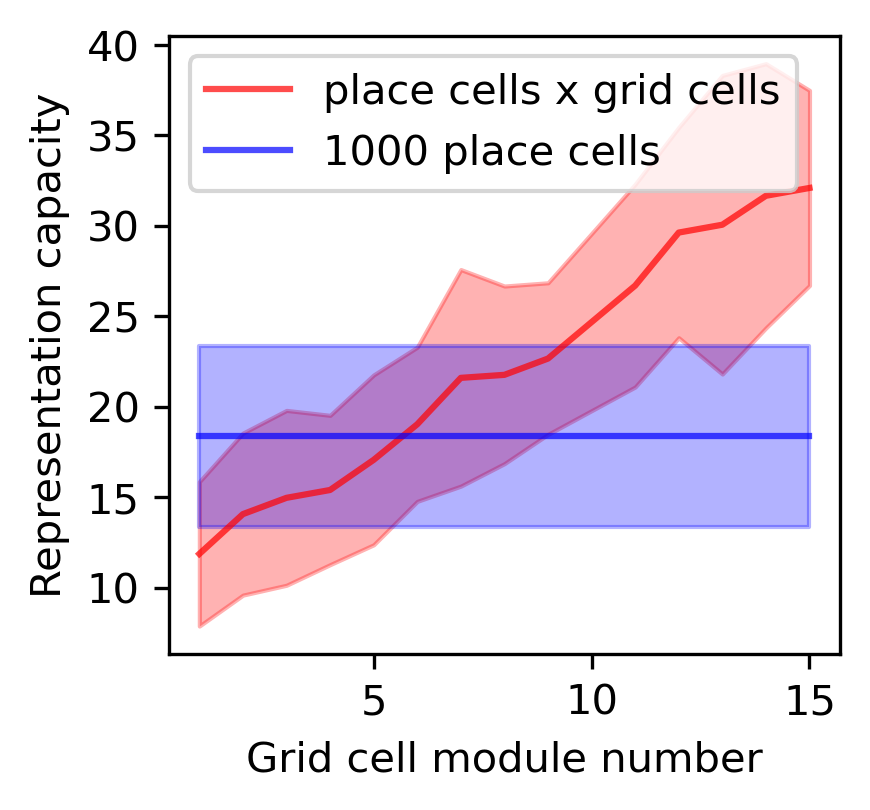

In [9]:
import os
import numpy as np

work_dir = f'/home/yulingwu/CCS_place_grid_0710/Storing_multiple_maps/test/result_20250709/grid_module'
place_num = 800
grid_nums = [200, 100, 67, 50, 40, 33, 29, 25, 22, 18, 17, 15, 14, 13] # 
module_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]
data = np.zeros((len(module_num), 30))

for emer, (grid_num, mod_num) in enumerate(zip(grid_nums, module_num)):
    # 设置次级目录
    sub_dir = os.path.join(work_dir, f'place_{place_num}_grid_{grid_num}_module_{mod_num}')
    capacity = np.load(os.path.join(sub_dir, 'capacity.npz'))
    data[emer] = capacity['capacity'][:30]

only_data = np.load(work_dir + '/place_1000/capacity.npz')['capacity'][:30]

# 计算均值和标准差
mean_capacity = data.mean(axis=1)
std_capacity = data.std(axis=1) # 标准误差
only_mean_capacity = np.full(len(module_num), only_data.mean())
only_std_capacity = np.full(len(module_num), only_data.std())  # 标准误差


plt.figure(figsize=(3,2.8), dpi=300)
plt.plot(module_num, mean_capacity, color='red', alpha=0.7, label='place cells x grid cells')
plt.fill_between(module_num, mean_capacity - std_capacity, mean_capacity + std_capacity, color='red', alpha=0.3)
plt.plot(module_num, only_mean_capacity, color='blue', alpha=0.7, label='1000 place cells')
plt.fill_between(module_num, only_mean_capacity - only_std_capacity, only_mean_capacity + only_std_capacity, color='blue', alpha=0.3)
plt.xlabel('Grid cell module number')
plt.ylabel('Representation capacity')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()